## K-Nearest Neighbors

*K-Nearest Neighbors* (or KNN for short) is a machine-learning algorithm that can be used for both classification and regression. The idea of this algorithm can be express in the following phrase: "Show me your ~~friends~~ *neighbors* and I will tell you who you are". For example, imagine that you are trying to build a binary classification model for a given set of labeled data points -- you want to be able to predict a binary class for any new data point. This situation is illustrated in the picture below:

<img src='https://drive.google.com/uc?export=view&id=1w2oVVRUIY8JJbM3w21QPBYWwlhGFD1sx' width='600'>

The positive (1) and negative (0) class data points are shown as green triangles and blue circles, respectively, and an unlabeled data point is shown as a red square. One obvious thing that you can do is just to check which one of the two classes is more numerous in the labeled data points that are closest to the unlabeled data point that you are trying to predict. These labeled data points are called the *nearest neighbors* of the unlabeled data point and in the KNN algorithm, you need to decide how many nearest neighbors you will be inspecting when making predictions. It is customary to denote the number of nearest neighbors as $K$ and this explains the name of this method.

For example, for the data set shown above, we may choose $K=3$. The three nearest neighbors of the red square data point are shown inside the purple circle: we have two positive class data points and one negative class data points, so we predict a probability of $2/3$ for the positive and $1/3$ for the negative class.

Alternatively, we can choose $K=7$. The seven nearest neghbors of the red square are shown inside the orange circle: there are three class 0 data points and five class 1 data points. Accordingly, the postive class probability is now equal to $5/7$ and the negative class probability is $3/7$.

For regression, instead counting the number of classes, we can take the average of the label values of the nearest neighbors and use it as a predicted label for the unlabeled data point.







### Example: the Iris flower data set

As you see, conceptually, the KNN algorithm is very simple. And it is not hard to implement it with the scikit-learn library. In this example, we will build a KNN classifier for the same Iris data set that we used for logistic regression. Let's load the data set first:

In [19]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris_data=load_iris()
iris = pd.DataFrame(data=iris_data['data'], columns=[col[:-5] for col in iris_data['feature_names']])
iris['target']=iris_data['target']

iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


This time let's work with the `sepal length` and `sepal width` features.

In [21]:
cols=['sepal length', 'sepal width']

X=iris[cols].values
y=iris['target'].values

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

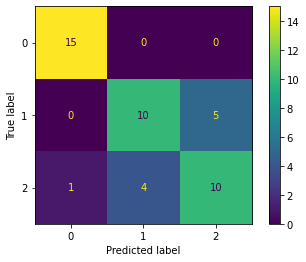

In [23]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Instantiate a KNN classifier with K=5 (the # of nearest neighbors)
knn=KNeighborsClassifier(n_neighbors=5)

# Fit on the training set
knn.fit(X_train, y_train)

# Predict on the test set
y_pred=knn.predict(X_test)

plot_confusion_matrix(knn, X_test, y_test)
plt.show()

In [24]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.71      0.67      0.69        15
           2       0.67      0.67      0.67        15

    accuracy                           0.78        45
   macro avg       0.77      0.78      0.77        45
weighted avg       0.77      0.78      0.77        45



To get familiar with the definition of the F1 score, please read the section of the "Logistic Regression" notebook called "F1 score". Here is an example illustrating how it can be computed.

In [25]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
from sklearn.metrics import f1_score

f1=f1_score(y_test, y_pred, average='macro')

print(f"The F1 score is {f1:.5f}.")

The F1 score is 0.77469.


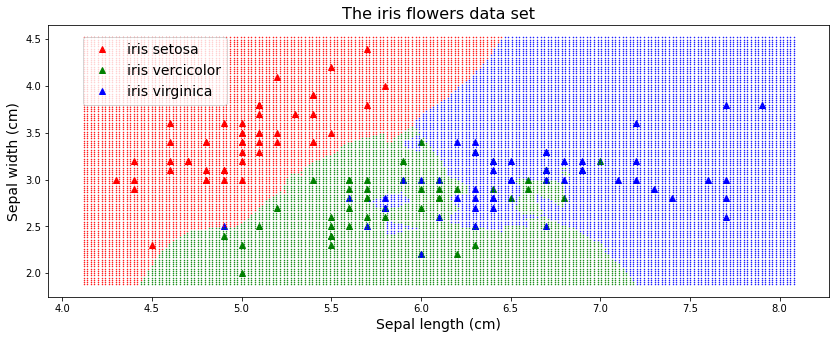

In [26]:
n_grid_x=200
ms=0.5

plt.figure(figsize=(14, 5))

plt.plot(X[y==0][:, 0], X[y==0][:, 1], '^', 
         color='red', label='iris setosa')
plt.plot(X[y==1][:, 0], X[y==1][:, 1], '^', 
         color='green', label='iris vercicolor')
plt.plot(X[y==2][:, 0], X[y==2][:, 1], '^', 
         color='blue', label='iris virginica')

# This is how you get the maximum and minimum 
# horizontal and vertical coordinates of the plot
x_min = plt.gca().get_xlim()[0]
x_max = plt.gca().get_xlim()[1]
y_min = plt.gca().get_ylim()[0]
y_max = plt.gca().get_ylim()[1]

x1 = np.linspace(x_min, x_max, n_grid_x)

# The number of grid point along the vertical axis
# is adjusted to have the same horizontal and vertical
# spacing between the grid points 
n_grid_y=int(n_grid_x*y_max/x_max)
x2 = np.linspace(y_min, y_max, n_grid_y)

# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
x1, x2 = np.meshgrid(x1, x2)
x1 = x1.reshape(n_grid_x*n_grid_y, -1)
x2 = x2.reshape(n_grid_x*n_grid_y, -1)

x_grid=np.hstack((x1, x2))

y_grid = knn.predict(x_grid)

plt.plot(x1[y_grid==0], x2[y_grid==0], 'o', color='red', ms=ms)
plt.plot(x1[y_grid==1], x2[y_grid==1], 'o', color='green', ms=ms)
plt.plot(x1[y_grid==2], x2[y_grid==2], 'o', color='blue', ms=ms)

plt.title("The iris flowers data set", fontsize=16)
plt.xlabel("Sepal length (cm)", fontsize=14)
plt.ylabel("Sepal width (cm)", fontsize=14)

plt.legend(loc='upper left', bbox_to_anchor=(0.035, -0.020, 1.0, 1.0), 
           fontsize=14)

plt.show()

### Hyperparamters tuning 

How to choose the number of nearest neighbors $K$? To answer this question let's pick some metric, for example, the accuracy, and determine how it depends on $K$.

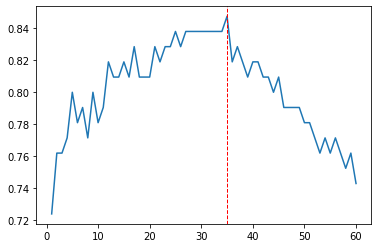

In [27]:
from sklearn.model_selection import cross_val_score

N=60
accuracy = []
neighbors = []

for k in range(1, N+1):
  neighbors.append(k)
  knn=KNeighborsClassifier(n_neighbors=k)
  acc_cv=cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
  accuracy.append(acc_cv.mean())

plt.plot(neighbors, accuracy, '-')
plt.axvline(x=35, color='red', linewidth=1, ls='--')
plt.show()

It looks like $K=35$ yields the highest accuracy. Let's use this value to make predictions on the test set. 

In [28]:
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(f"The accuracy on the test set is {acc:.5f}.")

The accuracy on the test set is 0.75556.


Let's compare this with the accuracy of a Softmax model. 

In [29]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(f"The accuracy on the test set is {acc:.5f}.")

The accuracy on the test set is 0.73333.
